Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-34-5dac1a1fdd3e>:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Clean whitespace


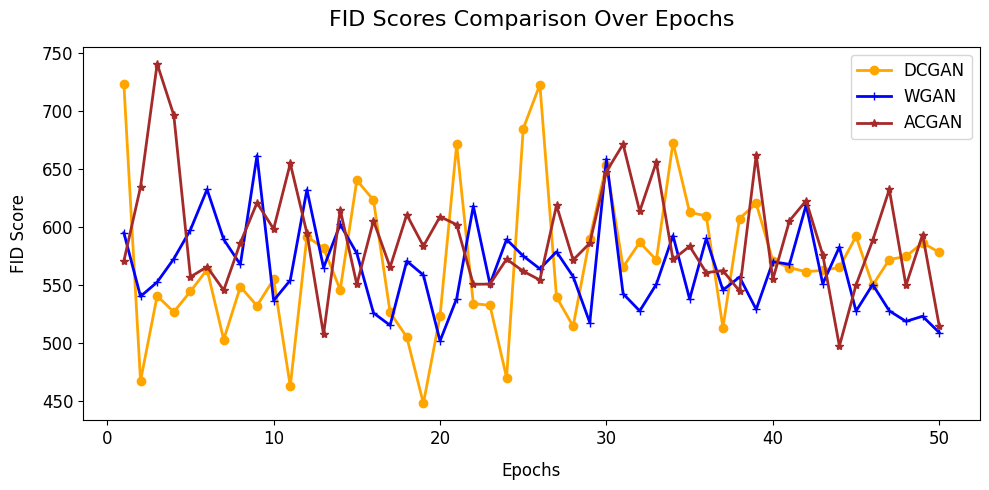

In [34]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Define a function to robustly clean and extract the data
def robust_clean_and_extract(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    # Filter out border and irrelevant lines
    clean_lines = [
        line.strip()
        for line in lines
        if not line.startswith(('╒', '├', '╘', '╞')) and '│' in line
    ]
    # Extract the actual data by splitting columns
    data = [line.split('│')[1:-1] for line in clean_lines]  # Ignore borders
    # Create DataFrame and clean headers
    df = pd.DataFrame(data[1:], columns=[col.strip() for col in data[0]])
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Clean whitespace
    return df

# File paths for the training results stored in the DL folder on Google Drive
file1 = '/content/drive/My Drive/DL/training_results1.txt'
file2 = '/content/drive/My Drive/DL/training_results2.txt'
file3 = '/content/drive/My Drive/DL/training_results3.txt'

# Clean and extract data from files
df1 = robust_clean_and_extract(file1)
df2 = robust_clean_and_extract(file2)
df3 = robust_clean_and_extract(file3)

# Convert columns to numeric for processing
df1['FID Score'] = pd.to_numeric(df1['FID Score'], errors='coerce')
df2['FID Score'] = pd.to_numeric(df2['FID Score'], errors='coerce')
df3['FID Score'] = pd.to_numeric(df3['FID Score'], errors='coerce')
df1['Epoch'] = pd.to_numeric(df1['Epoch'], errors='coerce')

# Extract epochs and FID scores for plotting
epochs = df1['Epoch']
fid_scores_dcgan = df1['FID Score']
fid_scores_wgan = df2['FID Score']
fid_scores_acgan = df3['FID Score']

# Plotting the FID scores
plt.figure(figsize=(10, 5))  # Increase figure size
plt.plot(epochs, fid_scores_dcgan, marker='o', label='DCGAN', color='orange', linewidth=2)
plt.plot(epochs, fid_scores_wgan, marker='+', label='WGAN', color='blue', linewidth=2)
plt.plot(epochs, fid_scores_acgan, marker='*', label='ACGAN', color='brown', linewidth=2)

# Adding labels, title, and legend
plt.title("FID Scores Comparison Over Epochs", fontsize=16, pad=15)  # Add padding to the title
plt.xlabel("Epochs", fontsize=12, labelpad=10)  # Add padding to the x-axis label
plt.ylabel("FID Score", fontsize=12, labelpad=10)  # Add padding to the y-axis label
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper right')  # Adjust legend location for spacing

# Adjust layout for more spacing around the plot
plt.tight_layout()

# Display the plot
plt.show()
